In [ ]:
import pandas as pd
print(pd. __version__)

In [ ]:
pip install pandas --upgrade

In [ ]:
pip install numpy --upgrade

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load the dataset
df = pd.read_excel('timeseries.xlsx')

# Perform Augmented Dickey-Fuller test
result = adfuller(df['X3'])

# Output the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if result[0] < result[4]['5%']:
    print("Reject the null hypothesis - Data is stationary")
else:
    print("Failed to reject the null hypothesis - Data is non-stationary")


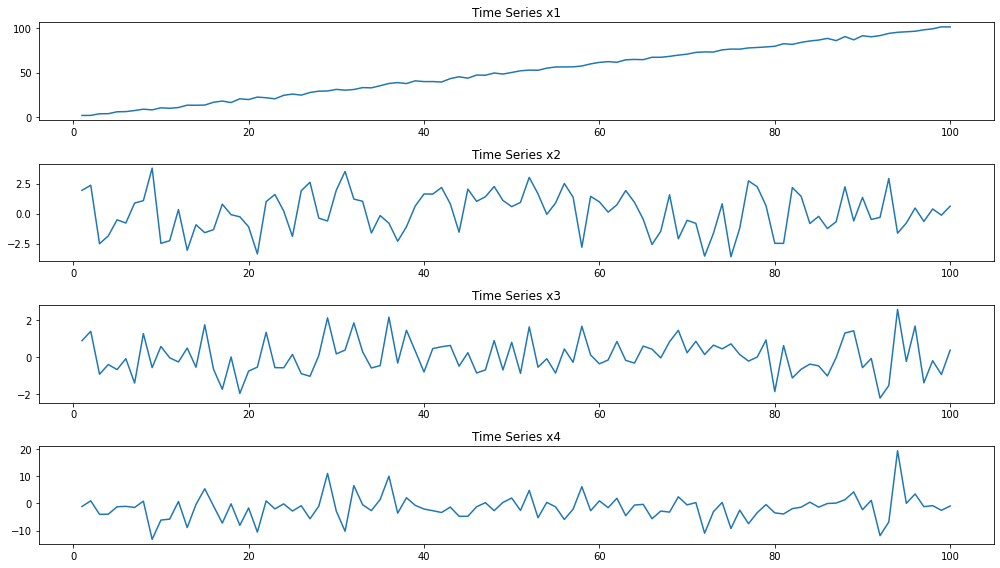

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
N = 100  # Length of the time series
alpha = 1.0  # Value of alpha
beta = 0.5  # Value of beta
noise_std = 1.0  # Standard deviation of noise

# Time vector
t = np.linspace(1, N, N)

# Piecewise function β(t)
beta_t = np.where(t <= N / 2, 0, beta)

# Function z(t) = αt + β(t)
z_t = alpha * t + beta_t

# Noise terms
e1 = np.random.normal(0, noise_std, N)
e2 = np.random.normal(0, noise_std, N)
e3 = np.random.normal(0, noise_std, N)
e4 = np.random.normal(0, noise_std, N)

# Equations for x1, x2, x3, x4
x1 = z_t + e1
x2 = -2 * np.sin(2 * x1) + e2
x3 = np.exp(-x1) * x2 + e3
x4 = x3**3 - x2**2 * np.cos(x3) + e4

# Plot the time series
plt.figure(figsize=(14, 8))
plt.subplot(4, 1, 1)
plt.plot(t, x1)
plt.title('Time Series x1')

plt.subplot(4, 1, 2)
plt.plot(t, x2)
plt.title('Time Series x2')

plt.subplot(4, 1, 3)
plt.plot(t, x3)
plt.title('Time Series x3')

plt.subplot(4, 1, 4)
plt.plot(t, x4)
plt.title('Time Series x4')

plt.tight_layout()
plt.show()


In [17]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming 'data' is a pandas DataFrame with your time series data
# Replace this with the actual data loading code
# data = pd.read_csv('path_to_your_data.csv')

def test_stationarity(timeseries):
    
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

def make_stationary(timeseries):
    # Differencing the series
    timeseries_diff = timeseries - timeseries.shift()
    timeseries_diff.dropna(inplace=True)
    
    return timeseries_diff

# Example usage:
# Assuming your time series data is in a column named 'value'
# Replace 'value' with the actual column name
data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'x4': x4
})
test_stationarity(data['x1'])
stationary_data = make_stationary(data['x1'])
test_stationarity(stationary_data)

import numpy

stationary_dataframe = pd.DataFrame({
    'x1': numpy.array(stationary_data),
    'x2': x2[1:],
    'x3': x3[1:],
    'x4': x4[1:]
})

Results of Dickey-Fuller Test:
Test Statistic                  0.670637
p-value                         0.989233
#Lags Used                     10.000000
Number of Observations Used    89.000000
Critical Value (1%)            -3.506057
Critical Value (5%)            -2.894607
Critical Value (10%)           -2.584410
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                 -5.391398
p-value                         0.000004
#Lags Used                      9.000000
Number of Observations Used    89.000000
Critical Value (1%)            -3.506057
Critical Value (5%)            -2.894607
Critical Value (10%)           -2.584410
dtype: float64


In [22]:
stationary_data

1     0.063112
2     1.834564
3     0.088804
4     2.111406
5     0.203919
        ...   
95    0.612590
96    1.582530
97    1.084200
98    2.241841
99   -0.111505
Name: x1, Length: 99, dtype: float64

Text(0.5, 1.0, 'Time Series x1')

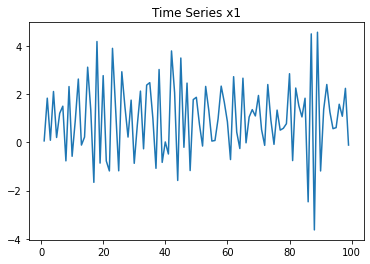

In [23]:
stat_t = np.linspace(1, 99, 99)
plt.plot(stat_t, stationary_data )
plt.title('Time Series x1')

In [8]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load the dataset


# Perform Augmented Dickey-Fuller test
result = adfuller(stationary_data)

# Output the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
    
if result[0] < result[4]['5%']:
    print("Reject the null hypothesis - Data is stationary")
else:
    print("Failed to reject the null hypothesis - Data is non-stationary")


ADF Statistic: -5.391398
p-value: 0.000004
Critical Values:
	1%: -3.506
	5%: -2.895
	10%: -2.584
Reject the null hypothesis - Data is stationary


  0%|          | 0/2 [00:00<?, ?it/s]

Edges in the estimated DAG:
[('x4', 'x3')]


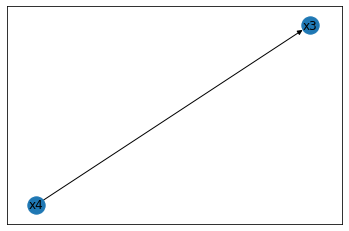

In [20]:
#PC
from pgmpy.estimators import PC
from sklearn.preprocessing import StandardScaler
from pgmpy.estimators import BicScore
import numpy as np

# Standardize the data before applying causal discovery algorithms
scaler = StandardScaler()
data_std = scaler.fit_transform(np.vstack([x1, x2, x3, x4]).T)

# Create a data frame as required by the PC algorithm in pgmpy
import pandas as pd
data_df = stationary_dataframe

# Initialize PC estimator with the data and the Bic Score
c = PC(data_df)

# The significance level for independence tests
alpha = 0.05

# Estimate the DAG
max_cond_vars = len(data_df.columns) - 2  # Maximum condition sets size
dag = c.estimate(return_type="dag", significance_level=alpha, max_cond_vars=max_cond_vars, ci_test="pearsonr")

# Print the edges of the DAG
print("Edges in the estimated DAG:")
print(dag.edges())

# Visualize the DAG if you have networkx and matplotlib installed
import networkx as nx
import matplotlib.pyplot as plt

nx.draw_networkx(dag, arrows=True)
plt.show()


In [ ]:
from causallearn.search.ConstraintBased.CDNOD import cdnod

# default parameters
cg = cdnod(data, c_indx)

# or customized parameters
cg = cdnod(data, c_indx, alpha, indep_test, stable, uc_rule, uc_priority, mvcdnod,
      correction_name, background_knowledge, verbose, show_progress)

# visualization using pydot
# note that the last node is the c_indx
cg.draw_pydot_graph()

# or save the graph
from causallearn.utils.GraphUtils import GraphUtils

pyd = GraphUtils.to_pydot(cg.G)
pyd.write_png('simple_test.png')

In [ ]:
data.values

In [ ]:
data = np.column_stack((x1, x2, x3, x4))

# Assuming the entire series under a single domain for simplicity
#c_indx = 0  # You might need to adapt this based on your domain knowledge

# CDNOD analysis with your parameters
cg = cdnod(data, alpha=0.05)


# Visualization using pydot
pyd = GraphUtils.to_pydot(cg.G)
pyd.write_png('simple_test.png')


In [ ]:
data.shape

c:\Users\flori\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\flori\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\flori\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\flori\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\flori\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warni

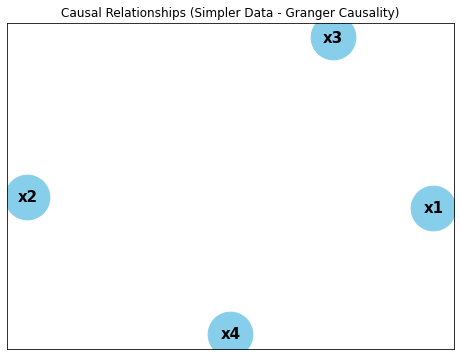

(None,
     x1  x2  x3  x4
 x2   0   0   0   0
 x3   0   0   0   0
 x4   0   0   0   0
 x1   0   0   0   0)

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
import networkx as nx


data = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'x4': x4
})

data_simple = stationary_dataframe


# Granger causality tests
max_lag = 2
alpha_significance = 0.05
granger_test_results = {}

for var in data_simple.columns:
    granger_test_results[var] = {}
    for causing_var in data_simple.columns:
        if var != causing_var:
            test_result = grangercausalitytests(data_simple[[var, causing_var]], max_lag, verbose=False)
            min_p_value = min(test_result[lag][0]['ssr_chi2test'][1] for lag in range(1, max_lag + 1))
            granger_test_results[var][causing_var] = min_p_value

# Convert results to DataFrame and identify significant relationships
p_values_df = pd.DataFrame(granger_test_results)
significant_relationships = (p_values_df < alpha_significance).astype(int)

# Plot the causal graph
G = nx.from_pandas_adjacency(significant_relationships, create_using=nx.DiGraph)

plt.figure(figsize=(8, 6))

nx.draw_networkx(G, with_labels=True, node_size=2000, node_color='skyblue', font_size=15, font_weight='bold')
plt.title('Causal Relationships (Simpler Data - Granger Causality)')
plt.show(), significant_relationships


In [37]:
data.values

array([[ 3.91334218e-01, -1.39133422e+00,  1.72762863e+00,
         3.45562937e+00],
       [ 2.98673357e+00, -4.98673357e+00,  1.26925975e+01,
         2.01878446e+03],
       [ 5.34365124e-01, -3.53436512e+00,  1.46972239e+00,
        -9.90704962e+00],
       [ 3.65944562e+00, -7.65944562e+00,  2.76429382e+01,
         2.10642482e+04],
       [ 5.29599555e+00, -1.02959955e+01,  5.47194083e+01,
         1.63737083e+05],
       [ 5.24338109e+00, -1.12433811e+01,  6.07353497e+01,
         2.23912497e+05],
       [ 8.05676464e+00, -1.50567646e+01,  1.22415988e+02,
         1.83426068e+06],
       [ 7.97354882e+00, -1.59735488e+01,  1.28669665e+02,
         2.12998569e+06],
       [ 8.89460980e+00, -1.78946098e+01,  1.59866073e+02,
         4.08540520e+06],
       [ 1.09876630e+01, -2.09876630e+01,  2.28546500e+02,
         1.19373438e+07],
       [ 1.05258978e+01, -2.15258978e+01,  2.28382968e+02,
         1.19117127e+07],
       [ 1.31799535e+01, -2.51799535e+01,  3.32294293e+02,
      

  0%|          | 0/4 [00:00<?, ?it/s]

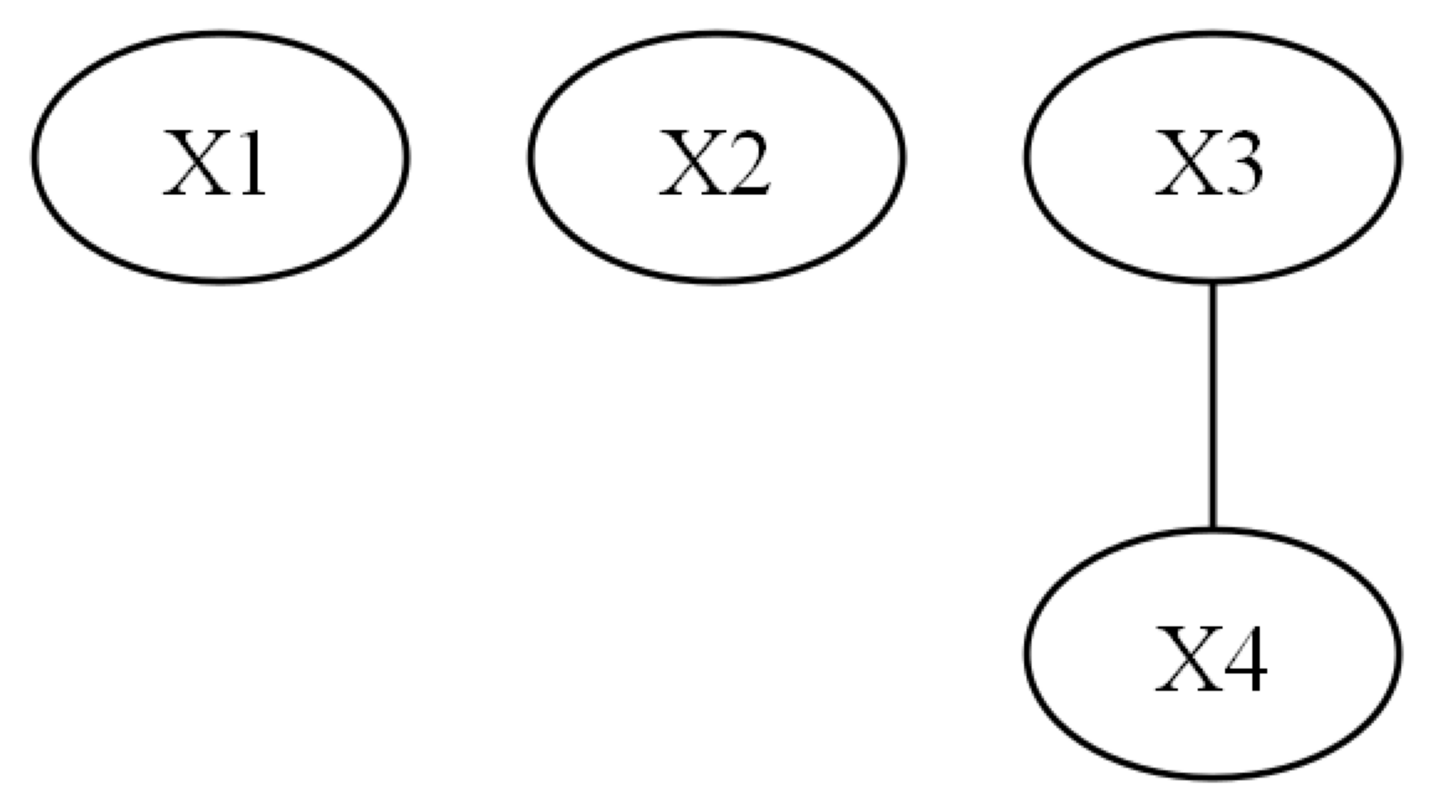

In [26]:
from causallearn.search.ConstraintBased.PC import pc


data = stationary_dataframe

# default parameters
cg = pc(data.values)

# or customized parameters
#cg = pc(data, alpha, indep_test, stable, uc_rule, uc_priority, mvpc, correction_name, background_knowledge, verbose, show_progress)

# visualization using pydot
cg.draw_pydot_graph()

# or save the graph
from causallearn.utils.GraphUtils import GraphUtils

pyd = GraphUtils.to_pydot(cg.G)
pyd.write_png('simple_test.png')

# # visualization using networkx
# cg.to_nx_graph()
# cg.draw_nx_graph(skel=False)

In [27]:
from causallearn.search.ConstraintBased.FCI import fci
data = stationary_dataframe
# default parameters
g, edges = fci(data.values)

# or customized parameters
# g, edges = fci(data, independence_test_method, alpha, depth, max_path_length,
#     verbose, background_knowledge, cache_variables_map)

# visualization
from causallearn.utils.GraphUtils import GraphUtils

pdy = GraphUtils.to_pydot(g)
pdy.write_png('FCI_simple_test.png')
# cg.to_nx_graph()
# cg.draw_nx_graph(skel=False)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

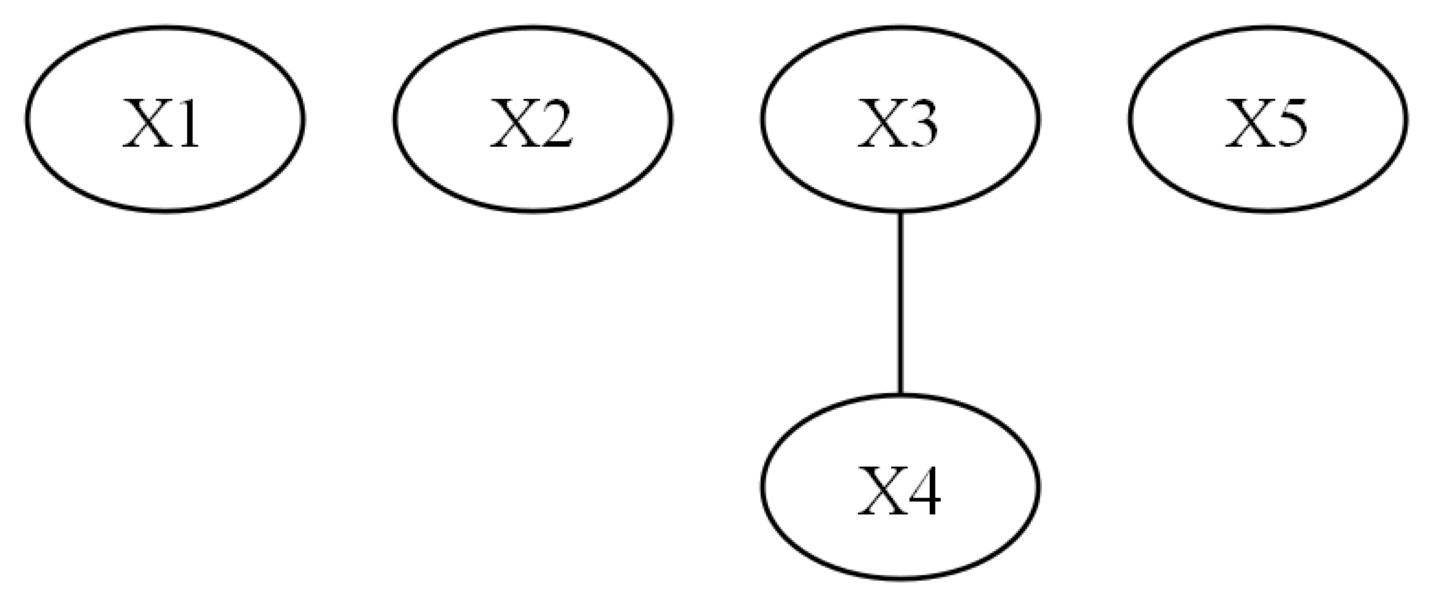

In [32]:
import numpy as np
import pandas as pd
from causallearn.search.ConstraintBased.CDNOD import cdnod
from causallearn.utils.GraphUtils import GraphUtils
import pydot
import os

graphviz_path = r'C:\Program Files\Graphviz\bin'
os.environ["PATH"] += os.pathsep + graphviz_path

# Assuming you have the time series data from previous code in the variables x1, x2, x3, x4
# Now create a DataFrame from your time series data

data = stationary_dataframe
# # Create the 'c_indx' array. If it represents a time index, it could just be the time steps:
# c_indx = np.arange(1, N+1)  # Assuming N is the length of your time series

# # Now add c_indx as a new column to your DataFrame
# data['c_indx'] = c_indx
c_indx = np.arange(1, 100).reshape(-1, 1)

# Make sure you pass the entire DataFrame to cdnod
# Specify the index of the c_indx column, which is the last column in the DataFrame
#cg = cdnod(data, c_indx )
cg = cdnod(data, c_indx, alpha=0.05, indep_test='fisherz', stable=True, uc_rule=0, uc_priority=1, mvcdnod=False,
           correction_name='MV_Crtn_Fisher_Z', background_knowledge=None, verbose=False, show_progress=True)


# Visualize using pydot
cg.draw_pydot_graph()

# Save the graph to a PNG file
pyd = GraphUtils.to_pydot(cg.G)
pyd.write_png('cdnod_causal_graph.png')


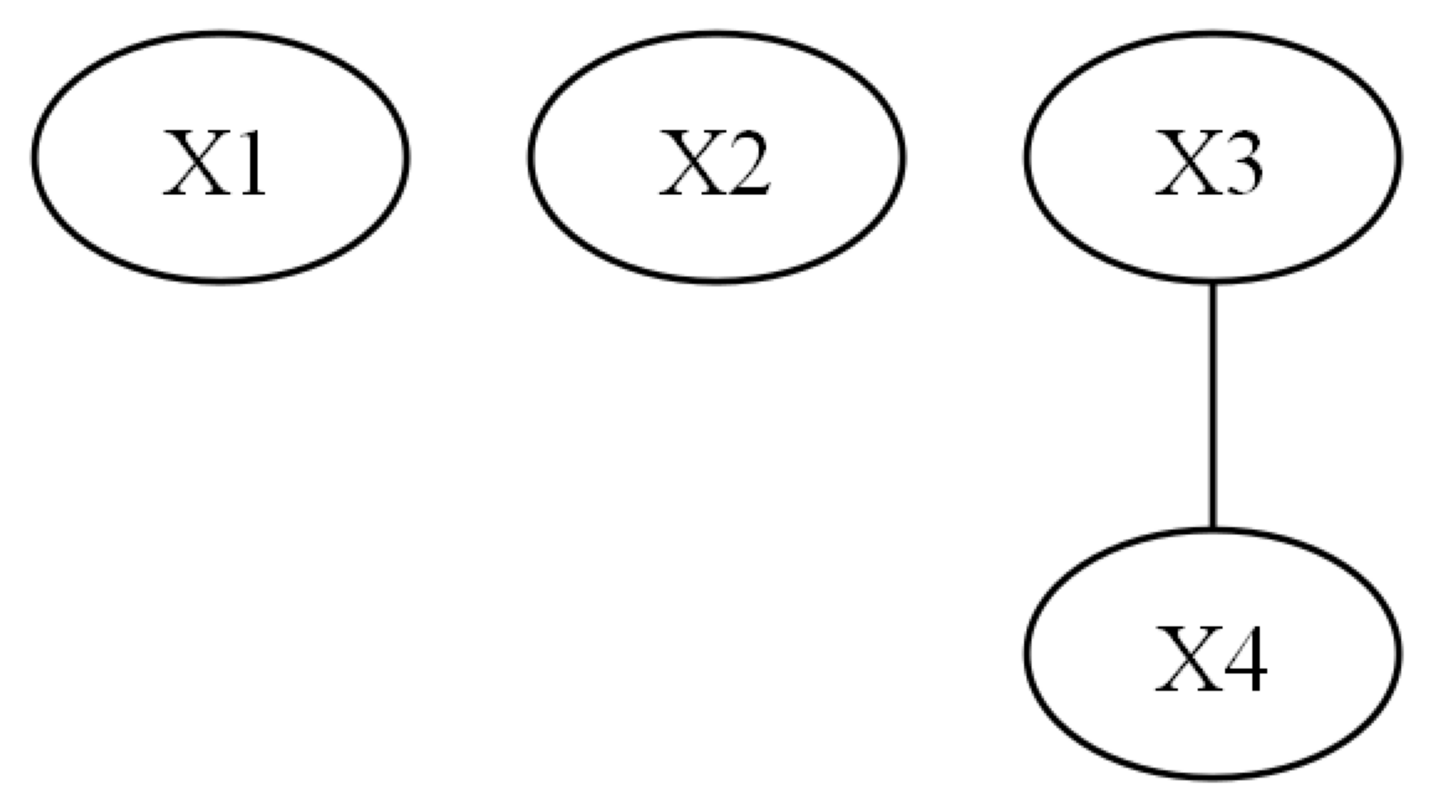

In [35]:
from causallearn.search.ScoreBased.GES import ges

# default parameters

data = stationary_dataframe
# or customized parameters
Record = ges(data)

# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

pyd = GraphUtils.to_pydot(Record['G'])
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()


# or save the graph
pyd.write_png('simple_test.png')

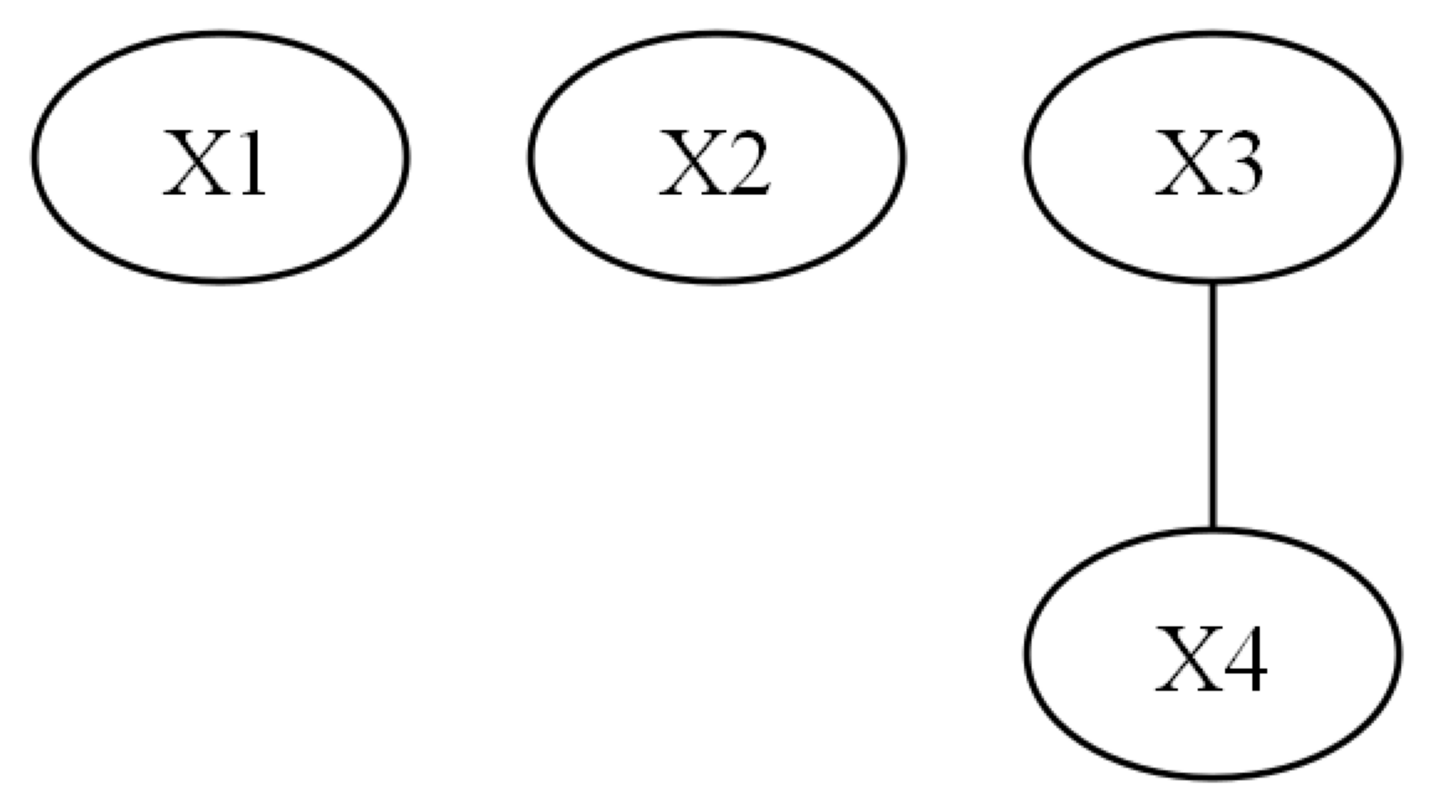

In [36]:
import numpy as np
import pandas as pd
from causallearn.search.ScoreBased.GES import ges
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

# Assuming 'data_array' is your data loaded as a numpy array
# data_array = np.array([...])  # Make sure this is defined
data = stationary_dataframe
data_array = data.values
# Running GES with default parameters
Record = ges(data_array)

# Visualization of the learned causal graph
pyd = GraphUtils.to_pydot(Record['G'])
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

# Saving the graph to a PNG file
pyd.write_png('ges_causal_graph.png')


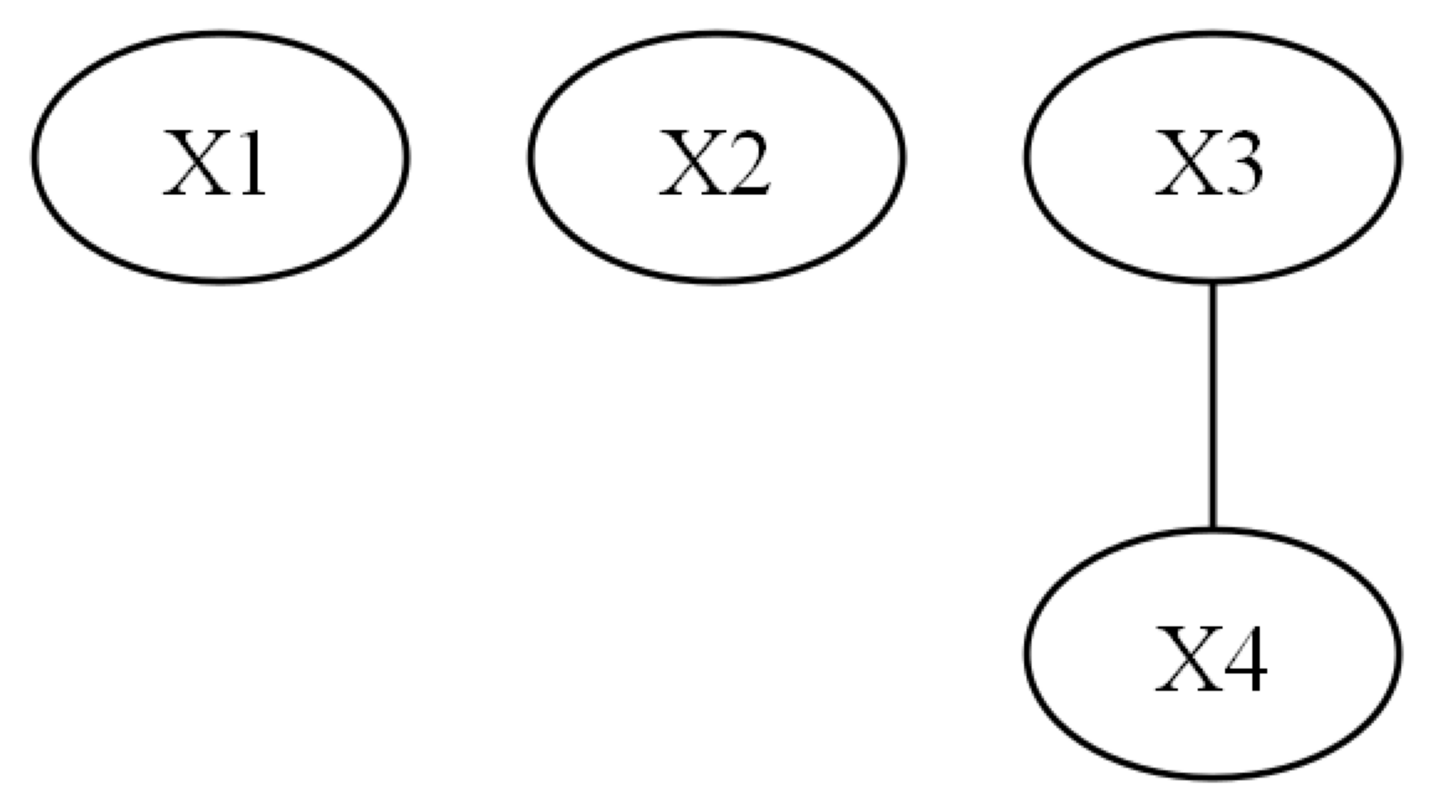

In [37]:
# Custom parameters
score_func = 'local_score_BIC'  # Example of specifying the BIC score function
maxP = 3  # Maximum number of parents

# Running GES with custom parameters
Record = ges(data_array, score_func=score_func, maxP=maxP)

# The rest is the same as above for visualization and saving

# Visualization of the learned causal graph
pyd = GraphUtils.to_pydot(Record['G'])
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

# Saving the graph to a PNG file
pyd.write_png('ges_causal_graph.png')


In [ ]:
cg